In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.sankey import Sankey
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("Damage functions-Grid view.csv")
data.columns

Index(['Name', 'Equation number', 'Model', 'Input variable',
       'Output variables', 'Equation shape', 'Zotero reference', 'IPCC risks'],
      dtype='object')

In [4]:
data = pd.read_csv("Damage functions-Grid view.csv")
data["Input variable"] = data["Input variable"].str.split(',')
data["Output variables"] = data["Output variables"].str.split(',')


In [5]:
data_expanded = data.explode('Input variable')
data_expanded = data_expanded.explode('Output variables')
data_expanded.head()

,Name,Equation number,Model,Input variable,Output variables,Equation shape,Zotero reference,IPCC risks
0,Total agriculture impact,A.1,FUND v.3.8,Damage in agricultural production,Total agriculture impact,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction"
0,Total agriculture impact,A.1,FUND v.3.8,Damage in agricultural production level,Total agriculture impact,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction"
0,Total agriculture impact,A.1,FUND v.3.8,Damage in agricultural production due to CO2 f...,Total agriculture impact,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction"
1,Agriculture impact of the rate of climate change,A.2,FUND v.3.8,Time,Damage in agricultural production,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food security reduction,Food production reduction"
1,Agriculture impact of the rate of climate change,A.2,FUND v.3.8,Region,Damage in agricultural production,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food security reduction,Food production reduction"


In [6]:
data_sankey = data_expanded.groupby(['Input variable', 'Output variables'], as_index=False).count()
data_sankey = data_sankey[["Input variable", "Output variables", "Name"]]
data_sankey.sort_values(by='Name', ascending=False)

,Input variable,Output variables,Name
135,Parameter,Value of the loss of ecosystems at time,3
130,Normalisation constant,Wetland value at time,2
133,Parameter,Number of species,2
19,Rate of change in precipitation,Real capital,2
92,Global mean temperature,Real capital,2
...,...,...,...
90,Global mean temperature,Productivity of land in agriculture,1
91,Global mean temperature,Productivity of land in forestry,1
93,Global mean temperature above pre-industrial,Change in water resources,1
94,Gross domestic product,Damage due to tropical storms in region r at t...,1


In [7]:
nodes = list(set(data_sankey['Input variable']).union(data_sankey['Output variables']))

In [8]:
links = []
for i, row in data_sankey.iterrows():
    source = nodes.index(row['Input variable'])
    target = nodes.index(row['Output variables'])
    value = row['Name']
    links.append({'source': source, 'target': target, 'value': value})


In [9]:
# Création du diagramme Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color="blue"
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color="blue"
    )
)])

# Affichage du diagramme
fig.write_html("sankey_diagram.html")

In [10]:
updated = pd.read_csv("Variables-Groupes.csv")
updated = updated.dropna(subset=["Module", "Sector", "Type"])
updated["Name"] = updated["Name"].str.strip()

updated.head()

,Name,Variable sign,Module,Sector,Type,Scope,Description,Unit,Status,Damage functions,Damage functions 2,Related equation,Zotero Source,Quantité (Damage functions)
5,Population in region r at time t,P,Demography,Population,Stock,NaN,Population at time t in region r,-,NaN,"Water resources impact,Human health : diarrhoe...",NaN,Equation W.1,NaN,4
6,Population in region r at time t,P,Demography,Population,Stock,NaN,Population size at time t in region r,-,NaN,"Space heating impact,Space cooling impact,Ecos...",NaN,Equation E.1,NaN,3
7,Population in region r at time t,P,Demography,Population,Stock,NaN,Population in region r at time t,-,NaN,NaN,NaN,Equation EST.2,NaN,0
8,Population density,d,Demography,Population,Density,NaN,Population density at time t in region r,person/square kilometer,NaN,"Wetland value,Human health : heat-related mort...",NaN,Equation SLR.8,NaN,2
9,Parameter for population growth response,η,Demography,Population,Growth,NaN,Parameter specifying how impacts respond to p...,-,NaN,Water resources impact,NaN,Equation W.1,NaN,1


In [11]:
updated_grouped = updated.groupby("Name").first().reset_index()
updated_grouped.head()

,Name,Variable sign,Module,Sector,Type,Scope,Description,Unit,Status,Damage functions,Damage functions 2,Related equation,Zotero Source,Quantité (Damage functions)
0,Actual cumulative dryland loss,CD,Climate,Natural capital,Stock,Regional,Actual cumulative dryland lost at time t in r...,-,NaN,"Potential dryland loss without protection,Actu...",Actual cumulative dryland loss,Equation SLR.2,None,2
1,Adjusted damages,AD (alpha),Economy,GDP,Stock,None,The total damages adjusted by the total weigh...,Mecu,NaN,Discounted damages,Adjusted damage,Equation (38),None,1
2,Annual unit wetland loss due to full coastal p...,ω,Economy,Natural capital,Stock,Regional,Annual unit wetland loss due to full coastal ...,square kilometer/metre,NaN,Net present cost of wetland loss,None,Equation SLR.11,None,1
3,Atmospheric CO2 concentrations,CO2,Climate,CO2 concentration,Stock,Global,Atmospheric concentration of carbon dioxide i...,ppm,NaN,Agriculture impact of fertilisation,None,Equation A.4,None,1
4,Change in forestry consumer and producer surplus,F,Economy,Production,Rate,Global,Change in forestry consumer and producer surp...,Share of total income,NaN,None,Forestry impact,Equation F.1,None,0


## We do it again now that we have updated similar function names

In [39]:
df_updated = pd.read_csv("Damage functions-Grid view(1).csv")
df_updated

,Name,Equation number,Model,Input variable,Output variables,Equation shape,Zotero reference,IPCC risks,Input categories,Output categories
0,Total agriculture impact,A.1,FUND v.3.8,"Damage in agricultural production,Damage in ag...",Total agriculture impact,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction",Production,Economy
1,Agriculture impact of the rate of climate change,A.2,FUND v.3.8,"Time,Region,Change in regional mean temperatur...",Damage in agricultural production,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food security reduction,Food production reduction",", Temperature",Economy
2,Agriculture impact of the level of climate change,A.3,FUND v.3.8,"Time,Region,Change in regional mean temperatur...",Damage in agricultural production level,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction",", Temperature",Economy
3,Agriculture impact of fertilisation,A.4,FUND v.3.8,"Time,Region,Pre-industrial concentration of CO...",Damage in agricultural production due to CO2 f...,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food security reduction,Food production reduction",", CO2 concentration",Economy
4,Agriculture production relative loss,A.5,FUND v.3.8,"Gross agricultural product,GDP in region r at ...",NaN,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction","Production, GDP,",NaN
...,...,...,...,...,...,...,...,...,...,...
57,Extreme events,3.1,GRACE,"Global mean temperature , Rate of change in pr...",Real capital,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,"Temperature, Precipitation",Economy
58,Sea-level rise,3.1,GRACE,"Global mean temperature , Rate of change in pr...",Real capital,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,"Temperature, Precipitation",Economy
59,Health,3.1,GRACE,"Global mean temperature , Rate of change in pr...",Labour,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,"Temperature, Precipitation",Economy
60,Dice-like damage,NaN,WITNESS,Global mean temperature,Climate damage fraction of gross output,NaN,NaN,NaN,Temperature,Economy


In [37]:
df_updated = pd.read_csv("Damage functions-Grid view(1).csv")

df_updated["Input variable"] = df_updated["Input variable"].str.split(",")
df_updated["Output variables"] = df_updated["Output variables"].str.split(",")


,Name,Equation number,Model,Input variable,Output variables,Equation shape,Zotero reference,IPCC risks,Input categories,Output categories
0,Total agriculture impact,A.1,FUND v.3.8,"Damage in agricultural production,Damage in ag...",Total agriculture impact,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction",[Production],[Economy]
1,Agriculture impact of the rate of climate change,A.2,FUND v.3.8,"Time,Region,Change in regional mean temperatur...",Damage in agricultural production,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food security reduction,Food production reduction","[, Temperature]",[Economy]
2,Agriculture impact of the level of climate change,A.3,FUND v.3.8,"Time,Region,Change in regional mean temperatur...",Damage in agricultural production level,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction","[, Temperature]",[Economy]
3,Agriculture impact of fertilisation,A.4,FUND v.3.8,"Time,Region,Pre-industrial concentration of CO...",Damage in agricultural production due to CO2 f...,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food security reduction,Food production reduction","[, CO2 concentration]",[Economy]
4,Agriculture production relative loss,A.5,FUND v.3.8,"Gross agricultural product,GDP in region r at ...",NaN,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction","[Production, GDP, ]",NaN
...,...,...,...,...,...,...,...,...,...,...
57,Extreme events,3.1,GRACE,"Global mean temperature , Rate of change in pr...",Real capital,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,"[Temperature, Precipitation]",[Economy]
58,Sea-level rise,3.1,GRACE,"Global mean temperature , Rate of change in pr...",Real capital,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,"[Temperature, Precipitation]",[Economy]
59,Health,3.1,GRACE,"Global mean temperature , Rate of change in pr...",Labour,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,"[Temperature, Precipitation]",[Economy]
60,Dice-like damage,NaN,WITNESS,Global mean temperature,Climate damage fraction of gross output,NaN,NaN,NaN,[Temperature],[Economy]


In [13]:

df_updated_exploded = df_updated.explode(["Input variable"])
df_updated_exploded = df_updated_exploded.explode(["Output variables"])


# We now group by couples input / output
df_updated_exploded = df_updated_exploded.groupby(["Input variable", "Output variables"], as_index=False).count()

# We keep only relevant columns
df_updated_exploded = df_updated_exploded[["Input variable", "Output variables", "Name"]]

df_updated_exploded

,Input variable,Output variables,Name
0,Adjusted damages,Net present value of global warming impacts,1
1,Adjusted tolerable level,Adjusted tolerable level,1
2,Adjusted tolerable level,Regional impact of global warming,1
3,Adjusted tolerable plateau,Adjusted tolerable level,1
4,Adjusted tolerable rate,Adjusted tolerable level,1
...,...,...,...
250,Total amount of wetland exposed to sea level r...,Cumulative wetland loss at time,1
251,Total amount of wetlands in 1990,Wetland value at time,1
252,Unit value of dryland,Unit value of dryland,1
253,Vector borne disease,Number of additional deaths from vector-borne ...,1


### We now do the sankey diagram

In [14]:
nodes_updated = list(set(df_updated_exploded['Input variable']).union(df_updated_exploded['Output variables']))
nodes_updated

['Productivity of land in forestry',
 'Labour',
 'Change in forestry consumer and producer surplus ',
 'Actual cumulative dryland loss ',
 'Fraction of coastline to be protected ',
 '??2 (theta 2) ',
 'Current temperature of the hottest or coldest month in the country ',
 ' Adjusted damages ',
 ' Tolerable plateau ',
 'Slope nonegative factors characteristic to an adaptive policy',
 'Parameter for degree of non-linearity of mortality in warming ',
 ' Tolerable rate of change ',
 '??1 (psi 1) ',
 'Discount rate for impacts',
 'Time',
 'Fish stock',
 'Parameter for impact response to warming ',
 'Potential dryland loss without protection ',
 'Net present value of dryland loss at time ',
 'Parameter for non-linearity of response of diarrhoea mortality to regional warming ',
 'Energy demand',
 ' Adjusted tolerable plateau ',
 'Benchmark mortality from extratropical cyclones for region r ',
 'Damage in agricultural production level ',
 'Pre-industrial concentration of CO2',
 ' Tolerable reg

In [15]:
links = []
for i, row in df_updated_exploded.iterrows():
    source = nodes_updated.index(row['Input variable'])
    target = nodes_updated.index(row['Output variables'])
    value = row['Name']
    links.append({'source': source, 'target': target, 'value': value})

links


[{'source': 7, 'target': 61, 'value': 1},
 {'source': 145, 'target': 145, 'value': 1},
 {'source': 145, 'target': 28, 'value': 1},
 {'source': 21, 'target': 145, 'value': 1},
 {'source': 56, 'target': 145, 'value': 1},
 {'source': 78, 'target': 40, 'value': 1},
 {'source': 147, 'target': 18, 'value': 1},
 {'source': 87, 'target': 77, 'value': 1},
 {'source': 54, 'target': 77, 'value': 1},
 {'source': 152, 'target': 92, 'value': 1},
 {'source': 109, 'target': 20, 'value': 1},
 {'source': 109, 'target': 27, 'value': 1},
 {'source': 109, 'target': 15, 'value': 1},
 {'source': 109, 'target': 1, 'value': 1},
 {'source': 109, 'target': 111, 'value': 1},
 {'source': 109, 'target': 144, 'value': 1},
 {'source': 109, 'target': 69, 'value': 1},
 {'source': 109, 'target': 0, 'value': 1},
 {'source': 109, 'target': 106, 'value': 2},
 {'source': 28, 'target': 92, 'value': 1},
 {'source': 72, 'target': 36, 'value': 1},
 {'source': 8, 'target': 21, 'value': 1},
 {'source': 8, 'target': 8, 'value': 1}

In [16]:
# Création du diagramme Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes_updated,
        color="blue"
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color="blue"
    )
)])

# Affichage du diagramme
fig.write_html("sankey_diagram.html")

### Using pysankey

In [17]:
from pysankey import sankey

We have to filter it because there are too many variables

In [35]:
variable_count = pd.DataFrame()

input_list = variable_count.loc[:,"Input"] = df_updated_exploded["Input variable"].value_counts()
input_list = input_list[input_list > 5].index.tolist()

output_list = variable_count.loc[:,"Input"] = df_updated_exploded["Output variables"].value_counts()
output_list = output_list[output_list > 8].index.tolist()

filtered_df = df_updated_exploded[df_updated_exploded['Input variable'].isin(input_list)]
filtered_df = filtered_df[filtered_df['Output variables'].isin(output_list)]

C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_24484\817849212.py:6: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan  2. nan nan nan  1.  3.  2. nan nan nan  2. nan nan nan  2.
  4. nan nan nan nan nan nan nan nan nan  2. nan nan nan  8. nan nan nan
 nan nan nan  2. nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  3. nan nan nan nan nan nan nan nan nan nan  5. nan  2. nan  2. nan nan
  2. nan  1.  2.  2. nan  3. nan nan nan nan nan nan nan nan nan nan nan
 nan  2. nan nan  5.  5.  6. nan nan nan nan nan  3.  6.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



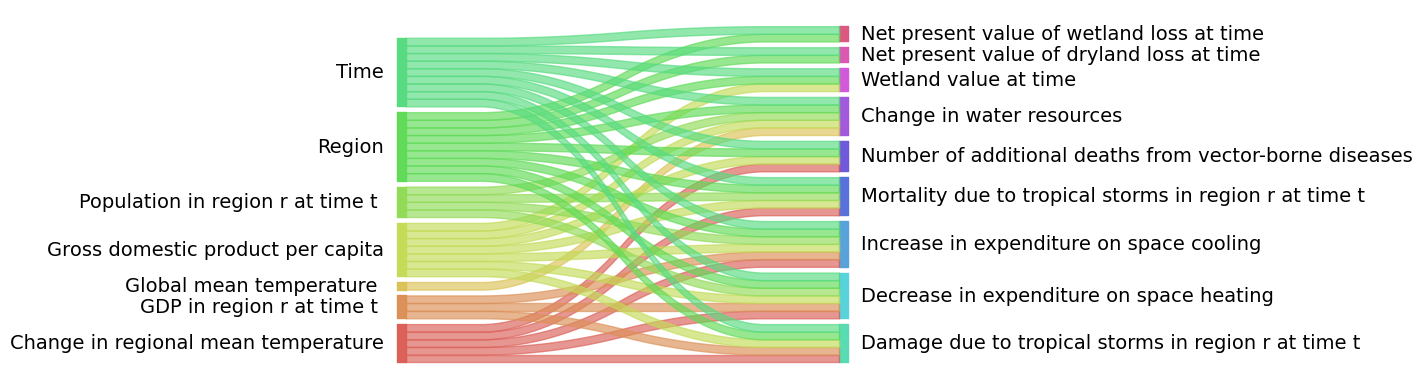

<Figure size 640x480 with 0 Axes>

In [36]:
ax = sankey(
    filtered_df["Input variable"], 
    filtered_df["Output variables"]
)

plt.show()
plt.savefig("sankey.png", bbox_inches='tight')

## Categories

Now we'll do the same trick with categories 

In [52]:
df_categories = pd.read_csv("Damage functions-Grid view(1).csv")

df_categories["Input categories"] = df_categories["Input categories"].str.split(",")
df_categories["Output categories"] = df_categories["Output categories"].str.split(",")

In [82]:

df_categories_expanded = df_categories.explode('Input categories')
df_categories_expanded = df_categories_expanded.explode('Output categories')


df_categories_expanded = df_categories_expanded[["Input categories", 'Output categories', 'Name']]

df_categories_expanded["Input categories"] = df_categories_expanded["Input categories"].str.strip()

df_categories_expanded = df_categories_expanded.replace("",None)
df_categories_expanded = df_categories_expanded.dropna(subset=["Input categories", "Output categories"])

df_categories_expanded.reset_index(drop=True, inplace=True)
df_categories_expanded.head()

,Input categories,Output categories,Name
0,Production,Production,Total agriculture impact
1,Temperature,Production,Agriculture impact of the rate of climate change
2,Temperature,Production,Agriculture impact of the level of climate change
3,CO2 concentration,Production,Agriculture impact of fertilisation
4,GDP,Production,Forestry impact


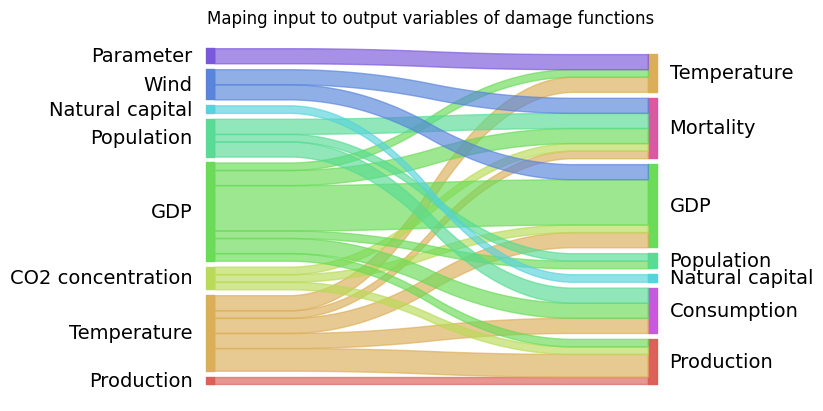

In [83]:
ax = sankey(
    df_categories_expanded["Input categories"], 
    df_categories_expanded["Output categories"]
)


plt.title("Mapping input to output variables of damage functions")
plt.show()